In [1]:
""" Linear Regression is a supervised optimisation algorithm which tries to find the best fit line of the form
    Y = m*X + b for the given data set """

import numpy as np # numpy library for working with tensors
import matplotlib.pyplot as plt # matplotlib library for plotting purposes
import pandas as pd # for importing and using data from csv file

In [2]:
# Reading training and testing data
train = pd.read_csv('./Dataset/train.csv')
test = pd.read_csv('./Dataset/test.csv')

In [3]:
train.head() # peeking the training data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
X = train['x']
Y = train['y']
test_X = test['x']
test_Y = test['y']
print('Shape of training data:\tX = {}    Y = {}'.format(X.shape, Y.shape))
print('Shape of testing data:\tX = {}    Y = {}'.format(test_X.shape, test_Y.shape))

Shape of training data:	X = (700,)    Y = (700,)
Shape of testing data:	X = (300,)    Y = (300,)


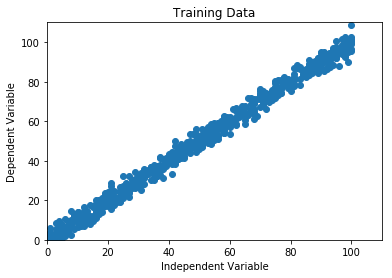

In [5]:
 # plotting the data points using matplotlib scatter plot function
plt.xlim(0, 110.0)
plt.ylim(0, 110.0)
plt.scatter(X, Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Training Data')
plt.show()

In [11]:
# defining random values for the regression line Y = m*X + b
m = np.random.rand() # m will act as the slope of the regression line
b = np.random.rand() # b will act as the Y-intercept of the regression line 

In [7]:
def gradient_descent_optimizer(slope, intercept, learning_rate, x_train, y_train, num_iter):
    
    for i in range(num_iter):
        # setting gradient of slope and intercept 0 for each interation of gradient descent
        grad_slope = 0
        grad_intercept = 0
        for i in range(len(x_train)):
            # using sum of squared as loss function i.e. loss = y_pred - y_true
            grad_slope =  - ((y_train[i] - slope*x_train[i] + intercept) *  x_train[i]) # gradient for slope
            grad_intercept = y_train[i] - slope*x_train[i] + intercept # gradient for intercept

        # averaging over all training examples
        grad_slope = 1/len(x_train) * grad_slope
        grad_intercept = 1/len(x_train) * grad_intercept
        
         # updating the parameters according to the given learning rate
        slope = slope - learning_rate*grad_slope
        intercept = intercept - learning_rate*grad_intercept
    return slope, intercept

In [13]:
print('Randomly initialized slope before any training: %f\nRandomly initialized intercept before any training: %f'
      %(m, b))
slope, intercept = gradient_descent_optimizer(m, b, 0.01, X, Y, 1000)
print('Slope after training: %f\nIntercept after training: %f' % (slope, intercept))

Randomly initialized slope before any training: 0.985315
Randomly initialized intercept before any training: 0.600319
Slope after training: 0.985315
Intercept after training: 0.600319


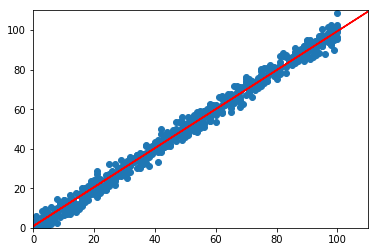

In [9]:
# plotting the result on training data
plt.xlim(0, 110.0)
plt.ylim(0, 110.0)
plt.plot(X, slope*X+intercept, color='r')
plt.scatter(X, Y)
plt.title('Resuts on Training Data')
plt.show()

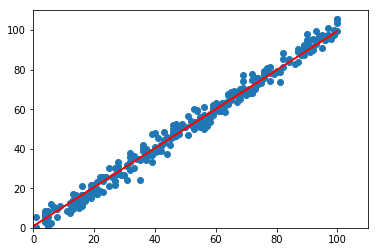

In [10]:
# plotting the result on testing data using trained prameters i.e. slope and intercept
plt.xlim(0, 110.0)
plt.ylim(0, 110.0)
plt.plot(test_X, slope*test_X+intercept, color='r')
plt.scatter(test_X, test_Y)
plt.title('Resuts on Testing Data')
plt.show()